In [1]:
import numpy as np
import cv2
import os
import math
import heatmap
from scipy import ndimage
from skimage import io

In [2]:
def resize(img,scale_percent):
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized

def imgshow(img):
    cv2.imshow('image', img) 
    k = cv2.waitKey(0) & 0xFF

    # wait for ESC key to exit 
    if k == 27:  
        cv2.destroyAllWindows() 

In [3]:
#GENERATE OCCLUSIONS
folder_path=""
for file in os.listdir(folder_path):    
    file_path=os.path.join(folder_path,file)
    img = cv2.imread(file_path) 
    img = resize(img,20)
    # imgshow(img)
    # cv2.imwrite('breast.jpg', img)

In [19]:
make_occlusions(img)

0
67
134
201
268
335
402
469
536
603
670
737
0
107
214
321
428
535
642
0
167
334


In [18]:
def make_occlusions(img):
    l,b,c=img.shape
    sc1=math.ceil(min(l,b)/10)
    sc2=math.ceil(min(l,b)/5)
    sc3=math.ceil(min(l,b)/2)
    imgs=[]
    occs=[]
    for i in range(0,l-sc1,math.ceil(sc1)):
        print(i)
        for j in range(0,b-sc1,math.ceil(sc1)):
            newimg=np.copy(img)
            newimg[i:i+sc1,j:j+sc1,:]=np.zeros((sc1,sc1,3))+255
            imgs.append(newimg)
            occs.append((i,i+sc1,j,j+sc1))
    for i in range(0,l-sc2,math.ceil(sc2/1.25)):
        print(i)
        for j in range(0,b-sc2,math.ceil(sc2/1.25)):
            newimg=np.copy(img)
            newimg[i:i+sc2,j:j+sc2,:]=np.zeros((sc2,sc2,3))+255
            imgs.append(newimg)
            occs.append((i,i+sc2,j,j+sc2))
    for i in range(0,l-sc3,math.ceil(sc3/2)):
        print(i)
        for j in range(0,b-sc3,math.ceil(sc3/2)):
            newimg=np.copy(img)
            newimg[i:i+sc3,j:j+sc3,:]=np.zeros((sc3,sc3,3))+255
            imgs.append(newimg)
            occs.append((i,i+sc3,j,j+sc3))
    os.mkdir("breast_occ")
    for i in range(len(imgs)):
        cv2.imwrite('breast_occ/breast'+str(i)+'.jpg', imgs[i])   

In [101]:
# FRCNN PREDICTIONS
pred_file=open('/Users/anvitmangal/Downloads/comp4_b70bb794-cbb4-4cdd-9be1-d894c57d0399_det_val_malignant.txt','r')
names=[]
conf=[]
xmin=[]
ymin=[]
xmax=[]
ymax=[]
lines=pred_file.readlines()
for line in lines:
    words=line.split()
    names.append(words[0])
    conf.append(float(words[1]))
    ymin.append(float(words[2]))
    xmin.append(float(words[3]))
    ymax.append(float(words[4]))
    xmax.append(float(words[5]))

In [11]:
# RETINANET PREDICTIONS

retina_pred_file=open('/Users/anvitmangal/Downloads/output_retinanet_occluded.txt','r')
lines=retina_pred_file.readlines()
names=[]
conf=[]
xmin=[]
ymin=[]
xmax=[]
ymax=[]
newlines=[]
name=''
for line in lines:
    newname=line.split(',')[0]
    if(newname!=name):
        newlines.append(line)
        name=newname
for line in newlines:
    words=line.split(',')
    names.append(words[0][:-4])
    conf.append(float(words[5]))
    ymin.append(float(words[1]))
    xmin.append(float(words[2]))
    ymax.append(float(words[3]))
    xmax.append(float(words[4]))

In [20]:
#HEATMAP TECHNIQUE 2

# gty,gtx,gtY,gtX=(140.4, 424.0, 252.6, 515.1) #FRCNN FOR BREAST
gty,gtx,gtY,gtX=(139.91626,416.70938,244.80476,536.5967) #RETINANET FOR BREAST
heat=np.zeros(img.shape[:2])
for i in range(len(imgs)):
    x1=occs[i][0]
    x2=occs[i][1]
    y1=occs[i][2]
    y2=occs[i][3]
    if('breast'+str(i) not in names):
        iou=0
    else:
        j=names.index('breast'+str(i))
        x=xmin[j]
        y=ymin[j]
        X=xmax[j]
        Y=ymax[j]
        iou=bb_iou((gtx,gty,gtX,gtY),(x,y,X,Y))
    print(iou)
    heat[x1:x2,y1:y2]+=(1-iou)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999998345566764
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999998345566764
0.9999998345566764
1.0
0.9999998345566764
0.9999998345566764
0.9999998345566764
1.0
0.999999834556

1.0
0.8816460128833673
0.8801315854159732
0.8816265557010947
0.8864294403208901
0.8839627062057479
0.8965139270237199
0.8285460240733344
0.5165464563510591
0
0
0
0
0
0
0
0.5915702549145134
0.7204812194033147
0.9012497710305166
0.9180052666134754
0.8914848317950305
0.992590961533673
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8804677866031813
0.8770827041035708
0.8852986303187863
0.877701579364398
0.8667336465559969
0.8966187404467306
0.8181351915717097
0.6747207337536554
0
0
0
0
0
0
0.5495454162948433
0.6846037001169668
0.7409840864379587
0.7882732174917755
0.9121192938012576
0.8803733591580433
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8817003201758141
0.8766745058732498
0.878415417198084
0.8692120885135
0.8683651555087956
0.8708502290042631
0.849478891589603
0.7802324519283412
0.5292375547851984
0.24336172824096836
0
0.19555163853184673
0.18921828031192597
0.39750734773129087
0.5991350356

1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8919217033503731
0.8297083733265913
0.7853222332336702
0.7321180978049667
0.6350649644859284
0.7809246663437397
0.7861929115532482
0.8293553162534502
0.7766738899940964
0.8880000024920163
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.880839237258326
0.8779821908257068
0.9373992713521434
0.9409356516154944
0.9216558341089623
0.9485370409559307
0.9413874580281064
0.8823453658951956
0.8501115073816377
0.8976919928697606
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9060745392067575
0.9025093975558499
0.9082621395775017
0.9069467522359863
0.8969936619234578
0.8923883075192647
0.8972600530730642
0.9025745914022336
0.8940014017374012
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9028349789109574
0.901068051127657
0.9031444401929627
0.9067320877331148
0.9084825373362062
0.9087225895068757
0.906663749919083
0.9095647626736816
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8969873948398678
0.8967376735220567
0.8970243334522732
0.896346569285245
0.8961356838995249
0.8988

In [61]:
#HEATMAP TECHNIQUE 1
heat=np.zeros(img.shape[:2])
for i in range(len(conf)):
    x=xmin[i]
    y=ymin[i]
    X=xmax[i]
    Y=ymax[i]
    heat[round(x):round(X),round(y):round(Y)]+=conf[i]

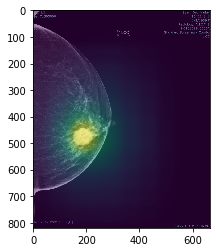

In [21]:
heat_map = ndimage.filters.gaussian_filter(heat, sigma=15)
add(img, heat_map, alpha=0.5, save='heat_map_retinanet.png')

In [45]:
imgshow(heat)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import transform

def add(image, heat_map, alpha=0.6, display=False, save=None, cmap='viridis', axis='on', verbose=False):

    height = image.shape[0]
    width = image.shape[1]

    # resize heat map
    heat_map_resized = transform.resize(heat_map, (height, width))

    # normalize heat map
    max_value = np.max(heat_map_resized)
    min_value = np.min(heat_map_resized)
    normalized_heat_map = (heat_map_resized - min_value) / (max_value - min_value)

    # display
    plt.imshow(image)
    plt.imshow(255 * normalized_heat_map, alpha=alpha, cmap=cmap)
    plt.axis(axis)

    if display:
        plt.show()

    if save is not None:
        if verbose:
            print('save image: ' + save)
        plt.savefig(save, bbox_inches='tight', pad_inches=0)

In [21]:
imgshow(img)

In [3]:
def bb_iou(boxA, boxB):
	# determine the (x, y)-coordinates of the intersection rectangle
	xA = max(boxA[0], boxB[0])
	yA = max(boxA[1], boxB[1])
	xB = min(boxA[2], boxB[2])
	yB = min(boxA[3], boxB[3])
 
	# compute the area of intersection rectangle
	interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
 
	# compute the area of both the prediction and ground-truth
	# rectangles
	boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
	boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
 
	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
	iou = interArea / float(boxAArea + boxBArea - interArea)
 
	# return the intersection over union value
	return iou

In [86]:
iou

0.11958519820971869

In [88]:
imgshow(heat)